In [1]:
# 텍스트 정제

In [2]:
import re

In [3]:
sentence = 'Sunil tweeted, "Witnessing 70th Republic Day of India from Rajpath,\
            New Delhi. Mesmerizing performance by Indian Army! Awesome airshow! @ india_official \
            @indian_army #India #70thRepublic_Day. For more photos ping me sunil@photoing.com :)"'

In [4]:
# 텍스트에서 숫자, 알파벳 문자, 공백만 남기고 모든 문자를 제거
re.sub(r'([^\s\w]|_)+', ' ', sentence).split()   # \s : 공백을 의미, \w : 숫자+알파벳문자를 의미

['Sunil',
 'tweeted',
 'Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath',
 'New',
 'Delhi',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army',
 'Awesome',
 'airshow',
 'india',
 'official',
 'indian',
 'army',
 'India',
 '70thRepublic',
 'Day',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil',
 'photoing',
 'com']

In [ ]:
# n-gram 추출

In [6]:
def n_gram_extractor(sentence, n):
    tokens = re.sub(r'([^\s\w]|_)+', ' ', sentence).split()
    for i in range(len(tokens)-n+1):
        print(tokens[i:i+n])

In [7]:
n_gram_extractor('The cute little boy is playing with the kitten.', 2)  # 2-gram

['The', 'cute']
['cute', 'little']
['little', 'boy']
['boy', 'is']
['is', 'playing']
['playing', 'with']
['with', 'the']
['the', 'kitten']


In [8]:
n_gram_extractor('The cute little boy is playing with the kitten.', 3)  # 3-gram

['The', 'cute', 'little']
['cute', 'little', 'boy']
['little', 'boy', 'is']
['boy', 'is', 'playing']
['is', 'playing', 'with']
['playing', 'with', 'the']
['with', 'the', 'kitten']


In [10]:
from nltk import ngrams
list(ngrams('The cute little boy is playing with the kitten.'.split(), 3))

[('The', 'cute', 'little'),
 ('cute', 'little', 'boy'),
 ('little', 'boy', 'is'),
 ('boy', 'is', 'playing'),
 ('is', 'playing', 'with'),
 ('playing', 'with', 'the'),
 ('with', 'the', 'kitten.')]

In [13]:
from textblob import TextBlob
blob = TextBlob('The cute little boy is playing with the kitten.')
blob.ngrams(n=3)

[WordList(['The', 'cute', 'little']),
 WordList(['cute', 'little', 'boy']),
 WordList(['little', 'boy', 'is']),
 WordList(['boy', 'is', 'playing']),
 WordList(['is', 'playing', 'with']),
 WordList(['playing', 'with', 'the']),
 WordList(['with', 'the', 'kitten'])]

In [ ]:
# 다른 패키지로 Tokenization

In [14]:
# Keras로 tokenization
from keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence(sentence)

Using TensorFlow backend.


['sunil',
 'tweeted',
 'witnessing',
 '70th',
 'republic',
 'day',
 'of',
 'india',
 'from',
 'rajpath',
 'new',
 'delhi',
 'mesmerizing',
 'performance',
 'by',
 'indian',
 'army',
 'awesome',
 'airshow',
 'india',
 'official',
 'indian',
 'army',
 'india',
 '70threpublic',
 'day',
 'for',
 'more',
 'photos',
 'ping',
 'me',
 'sunil',
 'photoing',
 'com']

In [15]:
# TextBlob으로 tokenization
from textblob import TextBlob
blob = TextBlob(sentence)
blob.words

WordList(['Sunil', 'tweeted', 'Witnessing', '70th', 'Republic', 'Day', 'of', 'India', 'from', 'Rajpath', 'New', 'Delhi', 'Mesmerizing', 'performance', 'by', 'Indian', 'Army', 'Awesome', 'airshow', 'india_official', 'indian_army', 'India', '70thRepublic_Day', 'For', 'more', 'photos', 'ping', 'me', 'sunil', 'photoing.com'])

In [16]:
# 트윗 tokenizer
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tweet_tokenizer.tokenize(sentence)

['Sunil',
 'tweeted',
 ',',
 '"',
 'Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath',
 ',',
 'New',
 'Delhi',
 '.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army',
 '!',
 'Awesome',
 'airshow',
 '!',
 '@',
 'india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day',
 '.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil@photoing.com',
 ':)',
 '"']

In [23]:
# MWE(Multi-Word Expression) tokenizer
from nltk.tokenize import MWETokenizer
mwe_tokenizer = MWETokenizer()
mwe_tokenizer.add_mwe(('Republic', 'Day'))  # Multi-Word 추가 
mwe_tokenizer.add_mwe(('Indian', 'Army'))   # Multi-Word 추가 => 출력결과에 반영되지 않았음
mwe_tokenizer.tokenize(sentence.split())

['Sunil',
 'tweeted,',
 '"Witnessing',
 '70th',
 'Republic_Day',
 'of',
 'India',
 'from',
 'Rajpath,New',
 'Delhi.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army!',
 'Awesome',
 'airshow!',
 '@',
 'india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil@photoing.com',
 ':)"']

In [24]:
# Indian_Army 를 만들기 위해 작업
mwe_tokenizer.tokenize(sentence.replace('!', '').split()) # 'Army!'의 '!'를 제거 

['Sunil',
 'tweeted,',
 '"Witnessing',
 '70th',
 'Republic_Day',
 'of',
 'India',
 'from',
 'Rajpath,New',
 'Delhi.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian_Army',
 'Awesome',
 'airshow',
 '@',
 'india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil@photoing.com',
 ':)"']

In [25]:
# 정규식 tokenizer
from nltk.tokenize import RegexpTokenizer
reg_tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
reg_tokenizer.tokenize(sentence)

['Sunil',
 'tweeted',
 ',',
 '"Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath',
 ',New',
 'Delhi',
 '.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army',
 '!',
 'Awesome',
 'airshow',
 '!',
 '@',
 'india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil',
 '@photoing.com',
 ':)"']

In [26]:
# 공백 tokenizer
from nltk.tokenize import WhitespaceTokenizer
wh_tokenizer = WhitespaceTokenizer()
wh_tokenizer.tokenize(sentence)

['Sunil',
 'tweeted,',
 '"Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath,New',
 'Delhi.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army!',
 'Awesome',
 'airshow!',
 '@',
 'india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil@photoing.com',
 ':)"']

In [28]:
# Word punct tokenizer
from nltk.tokenize import WordPunctTokenizer
wp_tokenizer = WordPunctTokenizer()
wp_tokenizer.tokenize(sentence)

['Sunil',
 'tweeted',
 ',',
 '"',
 'Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath',
 ',',
 'New',
 'Delhi',
 '.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army',
 '!',
 'Awesome',
 'airshow',
 '!',
 '@',
 'india_official',
 '@',
 'indian_army',
 '#',
 'India',
 '#',
 '70thRepublic_Day',
 '.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil',
 '@',
 'photoing',
 '.',
 'com',
 ':)"']

In [29]:
# 어간 추출

In [30]:
# RegexpStemmer 사용
from nltk.stem import RegexpStemmer
sentence = "I love playing football"
regex_stemmer = RegexpStemmer('ing$', min=4)
' '.join([regex_stemmer.stem(wd) for wd in sentence.split()])

'I love play football'

In [31]:
# PorterStemmer 사용
from nltk.stem.porter import *
sentence = "Before eating, it would be nice to sanitize your hands with a sanitizer"
ps_stemmer = PorterStemmer()
' '.join([ps_stemmer.stem(wd) for wd in sentence.split()])

'befor eating, it would be nice to sanit your hand with a sanit'

In [36]:
# 표제어 추출

In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
sentence = "The products produced by the process today are far better than what it produces generally."
' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(sentence)])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\beaus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'The product produced by the process today are far better than what it produce generally .'

In [37]:
# 단어의 단수화와 복수화

In [38]:
from textblob import TextBlob
sentence = TextBlob("She sells seashells on the seashore")
sentence.words

WordList(['She', 'sells', 'seashells', 'on', 'the', 'seashore'])

In [39]:
sentence.words[2].singularize()  # 3번째 단어 단수화

'seashell'

In [40]:
sentence.words[5].pluralize()  # 6번째 단어 복수화

'seashores'

In [41]:
# 스페인어 -> 영어 번역

In [43]:
from textblob import TextBlob
en_blob = TextBlob(u'muy bien')
en_blob.translate(from_lang='es', to='en')

TextBlob("very well")

In [44]:
# Feature 추출

In [45]:
import pandas as pd
df = pd.DataFrame([
    ['The interim budget for 2019 will be announced on 1st February.'],
    ['Do you know how much expectation the middle-class working population is having from this budget?'],
    ['February is the shortest month in a year.'],
    ['This financial year will end on 31st March.']    
])  # DataFrame 생성
df.columns = ['text']
df

,text
0,The interim budget for 2019 will be announced ...
1,Do you know how much expectation the middle-cl...
2,February is the shortest month in a year.
3,This financial year will end on 31st March.


In [46]:
from textblob import TextBlob
df['number_of_words'] = df['text'].apply(lambda x : len(TextBlob(str(x)).words))  # 각 문장의 단어 수 셈
df

,text,number_of_words
0,The interim budget for 2019 will be announced ...,11
1,Do you know how much expectation the middle-cl...,15
2,February is the shortest month in a year.,8
3,This financial year will end on 31st March.,8


In [47]:
wh_words = set(['why', 'who', 'which', 'what', 'where', 'when', 'how'])
# 각 문장에서 'wh-' 단어 리스트에 속하는 단어가 있는지 확인
df['is_wh_words_present'] = df['text'].apply(lambda x : True if len(set(TextBlob(str(x)).words).intersection(wh_words))>0 else False)
df

,text,number_of_words,is_wh_words_present
0,The interim budget for 2019 will be announced ...,11,False
1,Do you know how much expectation the middle-cl...,15,True
2,February is the shortest month in a year.,8,False
3,This financial year will end on 31st March.,8,False


In [48]:
df['language'] = df['text'].apply(lambda x : TextBlob(str(x)).detect_language())
df

,text,number_of_words,is_wh_words_present,language
0,The interim budget for 2019 will be announced ...,11,False,en
1,Do you know how much expectation the middle-cl...,15,True,en
2,February is the shortest month in a year.,8,False,en
3,This financial year will end on 31st March.,8,False,en


In [49]:
# BoW(단어 모음) 구현

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
corpus = [ 'Data Science is an overlap between Arts and Science',
           'Generally, Arts graduates are right-brained and Science graduates are left-brained',
           'Excelling in both Arts and Science at a time becomes difficult', 
           'Natural Language Processing is a part of Data Science'
         ]

In [51]:
bag_of_words_model = CountVectorizer()
print(bag_of_words_model.fit_transform(corpus).todense())
bag_of_word_df = pd.DataFrame(bag_of_words_model.fit_transform(corpus).todense())
bag_of_word_df.columns = sorted(bag_of_words_model.vocabulary_)
bag_of_word_df.head()

[[1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0]
 [0 1 2 1 0 0 0 0 2 0 0 0 1 2 0 0 0 1 0 0 0 0 0 1 1 0]
 [0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0]]


,an,and,are,arts,at,becomes,between,both,brained,data,...,language,left,natural,of,overlap,part,processing,right,science,time
0,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,2,0
1,0,1,2,1,0,0,0,0,2,0,...,0,1,0,0,0,0,0,1,1,0
2,0,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,1,0,1,1,0,1,1,0,1,0


In [53]:
bag_of_words_model_small = CountVectorizer(max_features=10)
bag_of_word_df_small = pd.DataFrame(bag_of_words_model_small.fit_transform(corpus).todense())
bag_of_word_df_small.columns = sorted(bag_of_words_model_small.vocabulary_)
bag_of_word_df_small.head()

,an,and,are,arts,brained,data,graduates,is,right,science
0,1,1,0,1,0,1,0,1,0,2
1,0,1,2,1,2,0,2,0,1,1
2,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,1


In [56]:
from pylab import *
import nltk
nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beaus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
newsgroups_data_sample = fetch_20newsgroups(subset='train')
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)

In [59]:
# newsgroups_data_sample['data']로부터 한 문장을 가져와, 해당 문장을 정규화하고 tokenizing한 다음, 각 token에 대해 불용어인지 확인하고 불용어가 아니면 tokenized_corpus에 저장
tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data'] for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)) if word.lower() not in stop_words]

In [60]:
token_count_di = Counter(tokenized_corpus)# 각 token의 빈도 수 계산
token_count_di.most_common(50) # 빈도 수가 높은 50개의 token 출력

[('ax', 62412),
 ('edu', 21321),
 ('subject', 12265),
 ('com', 12134),
 ('lines', 11835),
 ('organization', 11233),
 ('one', 9017),
 ('would', 8910),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5977),
 ('like', 5868),
 ('university', 5589),
 ('posting', 5507),
 ('know', 5134),
 ('get', 4998),
 ('host', 4996),
 ('nntp', 4814),
 ('max', 4776),
 ('think', 4583),
 ('also', 4308),
 ('use', 4187),
 ('time', 4102),
 ('new', 3986),
 ('good', 3759),
 ('ca', 3546),
 ('could', 3511),
 ('well', 3480),
 ('us', 3364),
 ('may', 3313),
 ('even', 3280),
 ('see', 3065),
 ('cs', 3041),
 ('two', 3015),
 ('way', 3002),
 ('god', 2998),
 ('first', 2976),
 ('many', 2945),
 ('make', 2894),
 ('much', 2879),
 ('system', 2817),
 ('distribution', 2767),
 ('right', 2742),
 ('world', 2724),
 ('say', 2706),
 ('want', 2522),
 ('go', 2474),
 ('anyone', 2468),
 ('10', 2466),
 ('reply', 2463)]

In [61]:
# TF-IDF 계산

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'Data Science is an overlap between Arts and Sceience',
    'Generally, Arts graduates are right-brained and Science graduates are left-brained',
    'Excelling in both Arts and Science at a time becomes difficult',
    'Natural Language Processing is a part of Data Science'
]

In [63]:
tfidf_model = TfidfVectorizer()
print(tfidf_model.fit_transform(corpus).todense())

[[0.39745413 0.25368982 0.         0.25368982 0.         0.
  0.39745413 0.         0.         0.3133574  0.         0.
  0.         0.         0.         0.3133574  0.         0.
  0.         0.         0.39745413 0.         0.         0.
  0.39745413 0.20740805 0.        ]
 [0.         0.159139   0.49864399 0.159139   0.         0.
  0.         0.         0.49864399 0.         0.         0.
  0.24932199 0.49864399 0.         0.         0.         0.24932199
  0.         0.         0.         0.         0.         0.24932199
  0.         0.13010656 0.        ]
 [0.         0.22444946 0.         0.22444946 0.35164346 0.35164346
  0.         0.35164346 0.         0.         0.35164346 0.35164346
  0.         0.         0.35164346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.18350214 0.35164346]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30887228 0.         0.
  0.         0.     

In [65]:
# TF-IDF 행렬을 DataFrame으로 생성
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(corpus).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,an,and,are,arts,at,becomes,between,both,brained,data,...,left,natural,of,overlap,part,processing,right,sceience,science,time
0,0.397454,0.253690,0.000000,0.253690,0.000000,0.000000,0.397454,0.000000,0.000000,0.313357,...,0.000000,0.000000,0.000000,0.397454,0.000000,0.000000,0.000000,0.397454,0.207408,0.000000
1,0.000000,0.159139,0.498644,0.159139,0.000000,0.000000,0.000000,0.000000,0.498644,0.000000,...,0.249322,0.000000,0.000000,0.000000,0.000000,0.000000,0.249322,0.000000,0.130107,0.000000
2,0.000000,0.224449,0.000000,0.224449,0.351643,0.351643,0.000000,0.351643,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183502,0.351643
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308872,...,0.000000,0.391765,0.391765,0.000000,0.391765,0.391765,0.000000,0.000000,0.204439,0.000000


In [66]:
# 가장 빈도수가 높은 10개 단어에 대해 TF-IDF 행렬을 DataFrame으로 생성
tfidf_model_small = TfidfVectorizer(max_features=10)
tfidf_df_small = pd.DataFrame(tfidf_model_small.fit_transform(corpus).todense())
tfidf_df_small.columns = sorted(tfidf_model_small.vocabulary_)
tfidf_df_small.head()

,and,are,arts,brained,data,graduates,is,right,sceience,science
0,0.349762,0.000000,0.349762,0.000000,0.432026,0.000000,0.432026,0.000000,0.54797,0.285953
1,0.170061,0.532867,0.170061,0.532867,0.000000,0.532867,0.000000,0.266433,0.00000,0.139036
2,0.612172,0.000000,0.612172,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.500491
3,0.000000,0.000000,0.000000,0.000000,0.640434,0.000000,0.640434,0.000000,0.00000,0.423897


In [67]:
# 코사인 유사도 계산

In [70]:
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

In [72]:
tfidf_model = TfidfVectorizer()
corpus = [pair1[0], pair1[1], pair2[0], pair2[1], pair3[0], pair3[1]]
tfidf_results = tfidf_model.fit_transform(corpus).todense()

In [74]:
cosine_similarity(tfidf_results[0], tfidf_results[1]) # 첫번째, 두번째 텍스트 사이의 코사인 유사도 계산

array([[0.3082764]])

In [75]:
cosine_similarity(tfidf_results[2], tfidf_results[3]) # 세번째, 네번째 텍스트 사이의 코사인 유사도 계산

array([[0.]])

In [76]:
cosine_similarity(tfidf_results[4], tfidf_results[5]) # 다섯번째, 여섯번째 텍스트 사이의 코사인 유사도 계산

array([[0.80368547]])

In [77]:
# 텍스트 시각화 방법

In [96]:
# 단어 구름 이용
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from wordcloud import STOPWORDS
from wordcloud import WordCloud

newsgroups_data_sample = fetch_20newsgroups(subset='train')

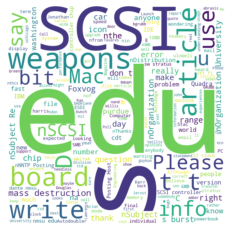

In [97]:
other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nLines', 'nI', "n'"]
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

text = str(newsgroups_data_sample['data'][:10])
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white', 
                      max_words=200, 
                      stopwords=stopwords, 
                      min_font_size = 10).generate(text)  # 단어 구름 생성

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()